# PERSONAL LOAN ACCEPTANCE PREDICTION PROJECT

## PROBLEM STATEMENT
**Banks need to identify which customers are most likely to accept a personal loan offer.
The problem is to build a predictive model that analyzes customer demographic and behavioral data to determine the likelihood of loan acceptance.**

## KAGGLE DATASET
**https://www.kaggle.com/datasets/henriqueyamahata/bank-marketing**

## LIBRARIES REQUIRED
* **Pandas**
* **numpy**
* **seaborn**
* **matplotlib**
* **scikit-learn**

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

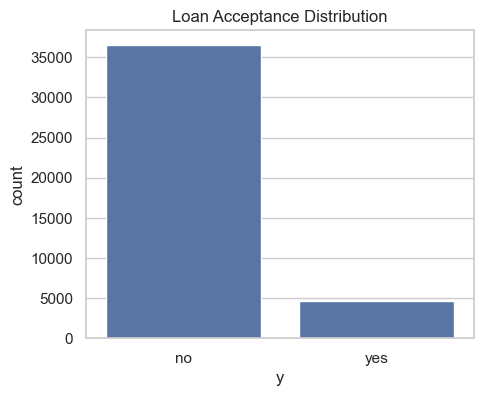

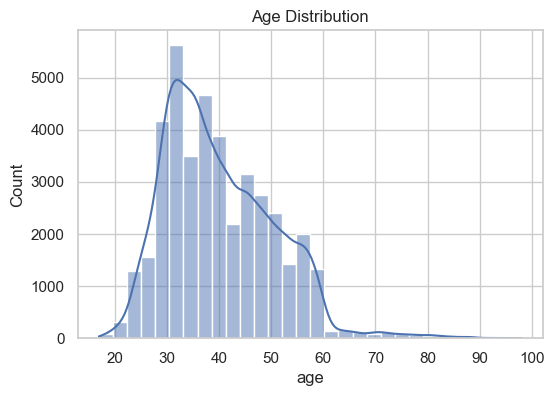

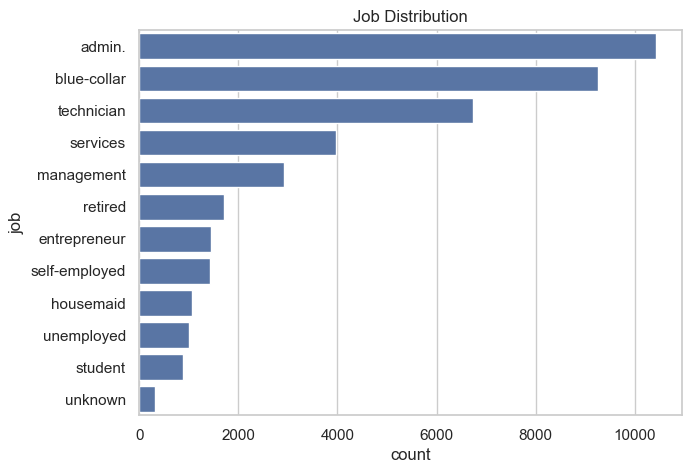

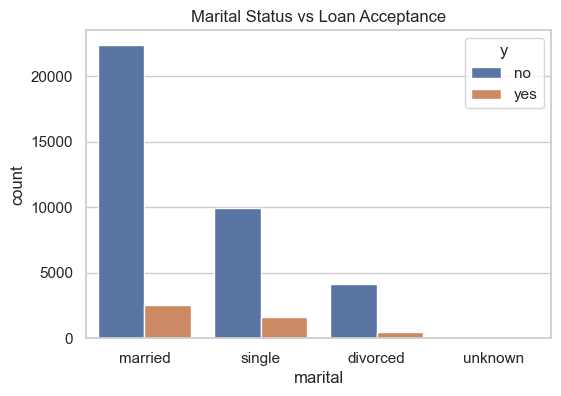

In [3]:
sns.set(style="whitegrid")

# Load Dataset

df = pd.read_csv("bank-additional-full.csv", sep=';')
df.head()

# 3. Data Exploration

df.info()
df.describe()
df.isnull().sum()

plt.figure(figsize=(5,4))
sns.countplot(x='y', data=df)
plt.title("Loan Acceptance Distribution")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

plt.figure(figsize=(7,5))
sns.countplot(y='job', data=df, order=df['job'].value_counts().index)
plt.title("Job Distribution")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='marital', hue='y', data=df)
plt.title("Marital Status vs Loan Acceptance")
plt.show()




In [5]:
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])

X = df.drop("y", axis=1)
y = df["y"]

# 4. Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

C:\Users\bjc\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


------ Logistic Regression ------
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7303
           1       0.68      0.41      0.51       935

    accuracy                           0.91      8238
   macro avg       0.80      0.69      0.73      8238
weighted avg       0.90      0.91      0.90      8238

ROC-AUC: 0.9299597777193608
------ Decision Tree ------
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7303
           1       0.65      0.54      0.59       935

    accuracy                           0.91      8238
   macro avg       0.80      0.75      0.77      8238
weighted avg       0.91      0.91      0.91      8238

ROC-AUC: 0.921393742663809


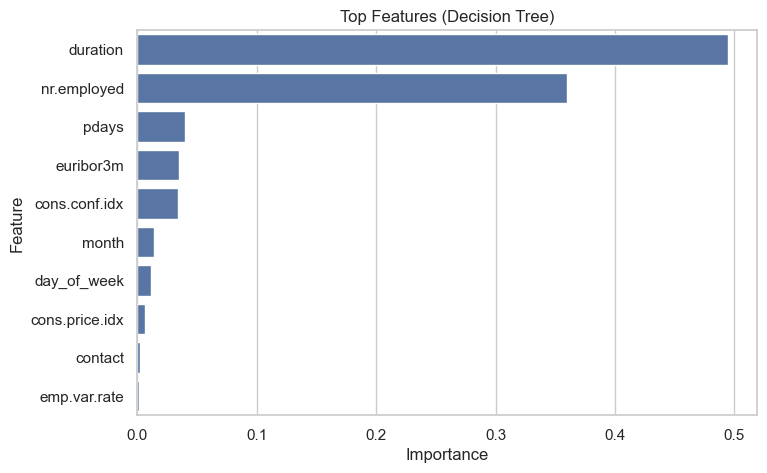

,Feature,Coefficient
16,cons.price.idx,0.447709
14,poutcome,0.239802
2,marital,0.080110
3,education,0.057390
17,cons.conf.idx,0.039214
9,day_of_week,0.033347
1,job,0.011235
10,duration,0.004466
0,age,0.003186
5,housing,-0.000651


In [7]:
# 5. Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

print("------ Logistic Regression ------")
print(classification_report(y_test, lr_pred))
print("ROC-AUC:", roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]))

# 6. Decision Tree
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

print("------ Decision Tree ------")
print(classification_report(y_test, dt_pred))
print("ROC-AUC:", roc_auc_score(y_test, dt.predict_proba(X_test)[:,1]))

# 7. Feature Importance (Tree)
fi = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(data=fi.head(10), x='Importance', y='Feature')
plt.title("Top Features (Decision Tree)")
plt.show()

fi.head(15)

# 8. Logistic Regression Coefficients
coef = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

coef.head(15)